
<h1><center>Tiền xử lý dữ liệu cho dữ liệu về chuẩn đoán bệnh tiểu đường</center></h1>

<h1>Nội dung </h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Giới thiệu về dữ liệu</a></li>
        <li><a href="#downloading_data">Tải dữ liệu</a></li>
        <li><a href="#pre-processing">Tiền xử lý dữ liệu</a></li>
    </ol>
</div>
<br>
<hr>

Import các thư viện sau:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
</ul>

In [1]:
import numpy as np
import pandas as pd

# Dự án Dự đoán Tiểu đường dựa trên Dữ liệu BRFSS 2015

## Dữ liệu

## Danh sach thuoc tinh
- Age
- Gender
- BMI
- SBP (Systolic Blood Pressure)
- DBP (Diastolic Blood Pressure)
- FPG (Fasting Plasma Glucose)
- FFPG (Final Fasting Plasma Glucose)
- Cholesterol
- Triglyceride
- HDL (High-Density Lipoprotein)
- LDL (Low-Density Lipoprotein)
- ALT (Alanine Aminotransferase)
- BUN (Blood urea nitrogen)
- CCR (Creatinine Clearance)
- Smoking Status: (1: Current Smoker, 2: Ever Smoker, 3: Never Smoker)
- Drinking Status: (1: Current Drinker, 2: Ever Drinker, 3: Never Drinker)
- Family History of Diabetes: (1: Yes, 0: No)
- Diabetes


<div id="downloading_data">
    <h2>Load dữ liệu từ file</h2>
<!--     Sử dụng wget để tải dữ liệu từ IBM Object Storage. -->
</div>

Đọc dữ liệu vào pandas dataframe

In [2]:
my_data = pd.read_csv("/content/diabetes.csv", delimiter=",")
my_data[0:5]

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


## Kích thước của dữ liệu (row, column)
+ row : so luong data
+ column : so thuoc tinh

In [3]:
my_data[0:125]

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,43,2,22.0,118,80,4.38,4.08,0.61,1.74,2.03,11.4,4.59,49.3,5.24,3.0,3.0,0,0
121,48,1,21.9,113,71,4.99,5.36,1.47,1.02,3.52,35.6,8.01,79.5,4.70,3.0,3.0,0,0
122,37,1,25.0,120,88,5.53,6.34,3.54,1.11,3.01,39.1,5.26,90.4,3.95,2.0,3.0,0,0
123,30,1,22.9,131,84,5.67,6.83,1.21,1.75,3.44,9.4,4.70,79.6,5.74,2.0,2.0,0,0


In [4]:
my_data.shape

(4303, 18)

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

<div href="pre-processing">
    <h2>Tiền xử lý dữ liệu</h2>
</div>

- Kiểm tra mising value

In [6]:
my_data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
SBP,0
DBP,0
FPG,0
Chol,0
Tri,0
HDL,0
LDL,0


- Tim nhieu
- Kiểm tra mô tả thống kê
- Tìm các cột có giá trị min/max không hợp lý.

In [7]:
my_data.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


✅ Trong trường hợp này:
- Triglyceride hoặc HDL bằng 0, rất có khả năng đây là lỗi dữ liệu hoặc giá trị thiếu (missing value) được mã hóa thành 0. Trong thực tế lâm sàng, những giá trị này không thể bằng 0 ở người sống.
- smoking	drinking : là thuộc tính phân loại nên không thể có giá trị thực

In [8]:
my_data[['Tri', 'HDL']]= my_data[['Tri', 'HDL']].replace(0,np.nan)
my_data[['smoking','drinking']] = my_data[['smoking','drinking']].replace(4.860753,np.nan)

In [9]:
my_data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
SBP,0
DBP,0
FPG,0
Chol,0
Tri,16
HDL,4
LDL,0


In [10]:
def class_fill_na(column):
    not_null_val = my_data[my_data[column].notnull()][[column, 'Diabetes']]
    mean_value = not_null_val.groupby(['Diabetes'])[[column]].mean().reset_index()
    my_data.loc[(my_data['Diabetes'] == 0) & (my_data[column].isnull()), column] = mean_value[column][0]
    my_data.loc[(my_data['Diabetes'] == 1) & (my_data[column].isnull()), column] = mean_value[column][1]

columns= ['Tri', 'HDL']
for column in columns:
    class_fill_na(column)

In [11]:
my_data = my_data.dropna()

In [12]:
my_data.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000
mean,45.050073,1.339678,23.830963,121.229575,75.612592,5.063124,4.819401,1.525864,1.493954,2.850866,26.570009,4.772459,72.098553,5.400802,2.523865,2.780673,0.066764,0.121523
std,13.776359,0.473669,3.341138,16.461544,10.537439,0.692572,0.915309,1.255185,0.788255,0.795800,22.902962,1.212855,15.797180,1.027762,0.828216,0.468931,0.249650,0.326782
min,22.000000,1.000000,15.600000,72.000000,47.000000,2.840000,1.650000,0.030000,0.450000,0.540000,4.500000,1.380000,4.860753,3.570000,1.000000,1.000000,0.000000,0.000000
25%,34.000000,1.000000,21.400000,110.000000,68.000000,4.620000,4.170000,0.815000,1.130000,2.310000,14.000000,3.900000,60.600000,4.850000,2.000000,3.000000,0.000000,0.000000
50%,42.000000,1.000000,23.600000,120.000000,75.000000,5.010000,4.760000,1.220000,1.320000,2.740000,20.100000,4.680000,72.700000,5.200000,3.000000,3.000000,0.000000,0.000000
75%,54.000000,2.000000,26.000000,131.000000,82.000000,5.450000,5.380000,1.850000,1.560000,3.270000,30.950000,5.490000,82.800000,5.600000,3.000000,3.000000,0.000000,0.000000
max,93.000000,2.000000,37.000000,197.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,14.640000,214.400000,20.600000,3.000000,3.000000,1.000000,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

- **'Gender', 'family_histroy'**: la cac thuoc tinh co so luong phan tu gan giong nhau trong ac lop =>> khong donh nhieu vai tro trong model

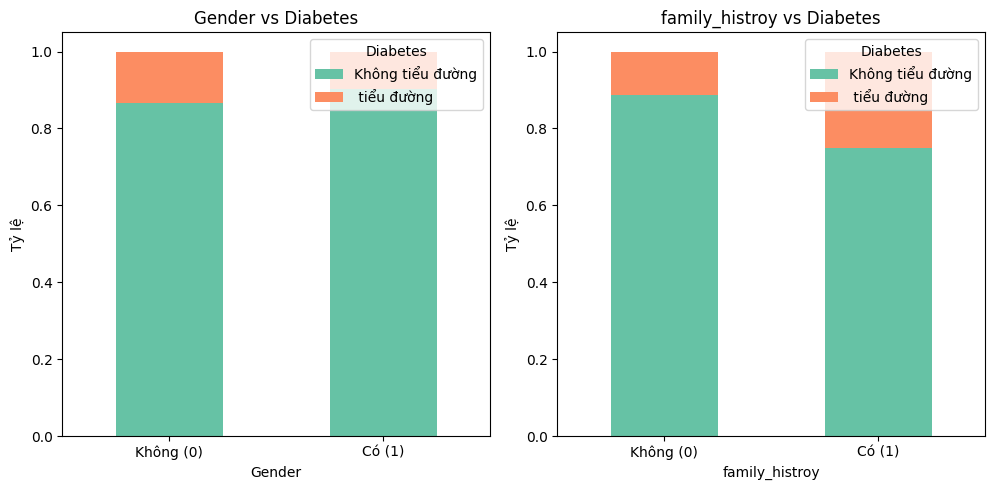

In [14]:
# Danh sách các thuộc tính nhị phân (loại bỏ Diabetes_012 và các thuộc tính không nhị phân)
binary_columns = ['Gender', 'family_histroy']

# Đảm bảo các cột đều là kiểu float
df = my_data.astype(float)

# Thiết lập kích thước tổng thể của biểu đồ
num_plots = len(binary_columns)
n_cols = 3  # Số cột trong grid biểu đồ
n_rows = (num_plots + n_cols - 1) // n_cols  # Số hàng cần thiết
plt.figure(figsize=(15, 5 * n_rows))

# Vẽ biểu đồ cột chồng cho từng thuộc tính nhị phân
for i, col in enumerate(binary_columns, 1):
    # Tính số lượng hoặc tỷ lệ của Diabetes_012 theo từng giá trị của thuộc tính nhị phân
    cross_tab = pd.crosstab(df[col], df['Diabetes'], normalize='index')  # Tỷ lệ hóa theo hàng
    # cross_tab = pd.crosstab(df[col], df['Diabetes_012'])  # Nếu bạn muốn số lượng thay vì tỷ lệ

    # Chuyển đổi thành DataFrame để vẽ biểu đồ
    cross_tab = cross_tab.rename(columns={0.0: 'Không tiểu đường', 1.0: ' tiểu đường'})

    # Vẽ biểu đồ cột chồng
    plt.subplot(n_rows, n_cols, i)
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#66c2a5', '#fc8d62', '#8da0cb'])
    plt.title(f'{col} vs Diabetes')
    plt.xlabel(col)
    plt.ylabel('Tỷ lệ')
    plt.xticks(ticks=[0, 1], labels=['Không (0)', 'Có (1)'], rotation=0)
    plt.legend(title='Diabetes', loc='upper right')

# Điều chỉnh layout để tránh trùng lặp
plt.tight_layout()
plt.show()

<ipython-input-15-97d9afff7c91>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-15-97d9afff7c91>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-15-97d9afff7c91>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-15-97d9afff7c91>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

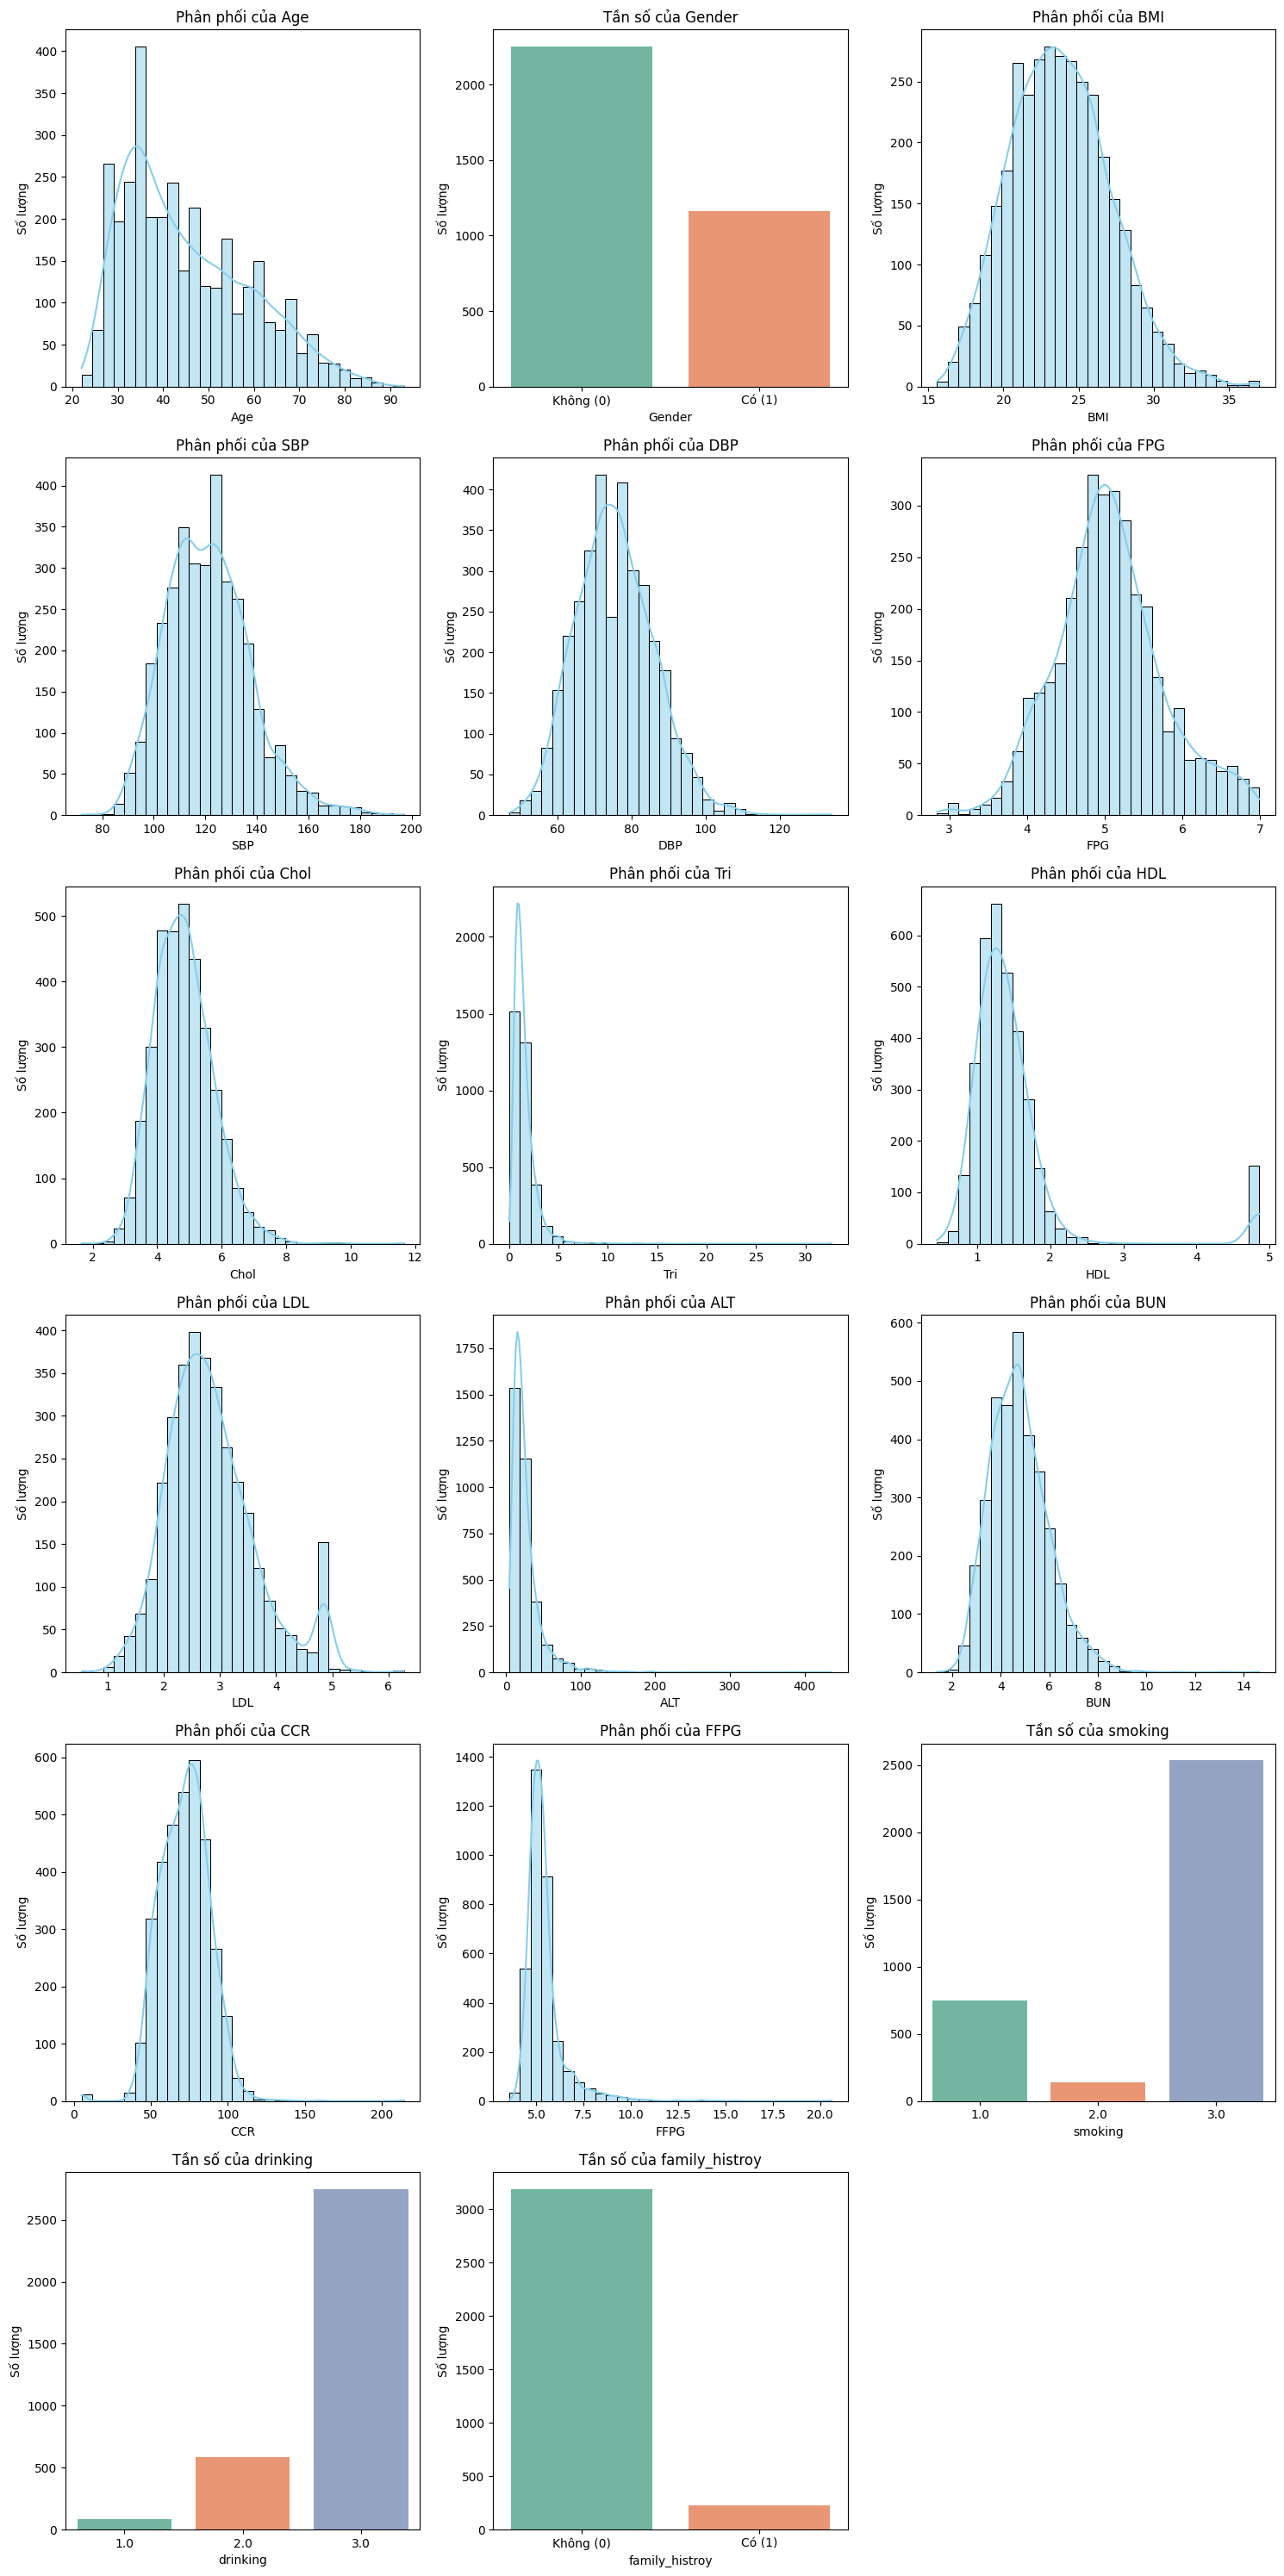

In [15]:
# Danh sách các cột trong tập dữ liệu
columns = ['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol',
           'Tri', 'HDL', 'LDL', 'ALT', 'BUN',
           'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy']

# Phân loại các cột
binary_columns = ['Gender', 'family_histroy']
continuous_columns = ['Age', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol',
           'Tri', 'HDL', 'LDL', 'ALT', 'BUN',
           'CCR', 'FFPG']
categorical_columns = ['smoking', 'drinking']

# Thiết lập kích thước tổng thể của biểu đồ
num_plots = len(columns)
n_cols = 3  # Số cột trong grid biểu đồ
n_rows = (num_plots + n_cols - 1) // n_cols  # Số hàng cần thiết
plt.figure(figsize=(15, 5 * n_rows))

# Vẽ biểu đồ tần số cho từng cột
for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)

    if col in binary_columns:
        # Với các cột nhị phân, vẽ bar chart
        sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f'Tần số của {col}')
        plt.xlabel(col)
        plt.ylabel('Số lượng')
        plt.xticks(ticks=[0, 1], labels=['Không (0)', 'Có (1)'], rotation=0)

    elif col in continuous_columns:
        # Với các cột liên tục, vẽ histogram
        sns.histplot(data=df, x=col, bins=30, color='skyblue', kde=True)
        plt.title(f'Phân phối của {col}')
        plt.xlabel(col)
        plt.ylabel('Số lượng')

    elif col in categorical_columns:
        # Với các cột phân loại, vẽ bar chart
        sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f'Tần số của {col}')
        plt.xlabel(col)
        plt.ylabel('Số lượng')

# Điều chỉnh layout để tránh trùng lặp
plt.tight_layout()
plt.show()

<Axes: >

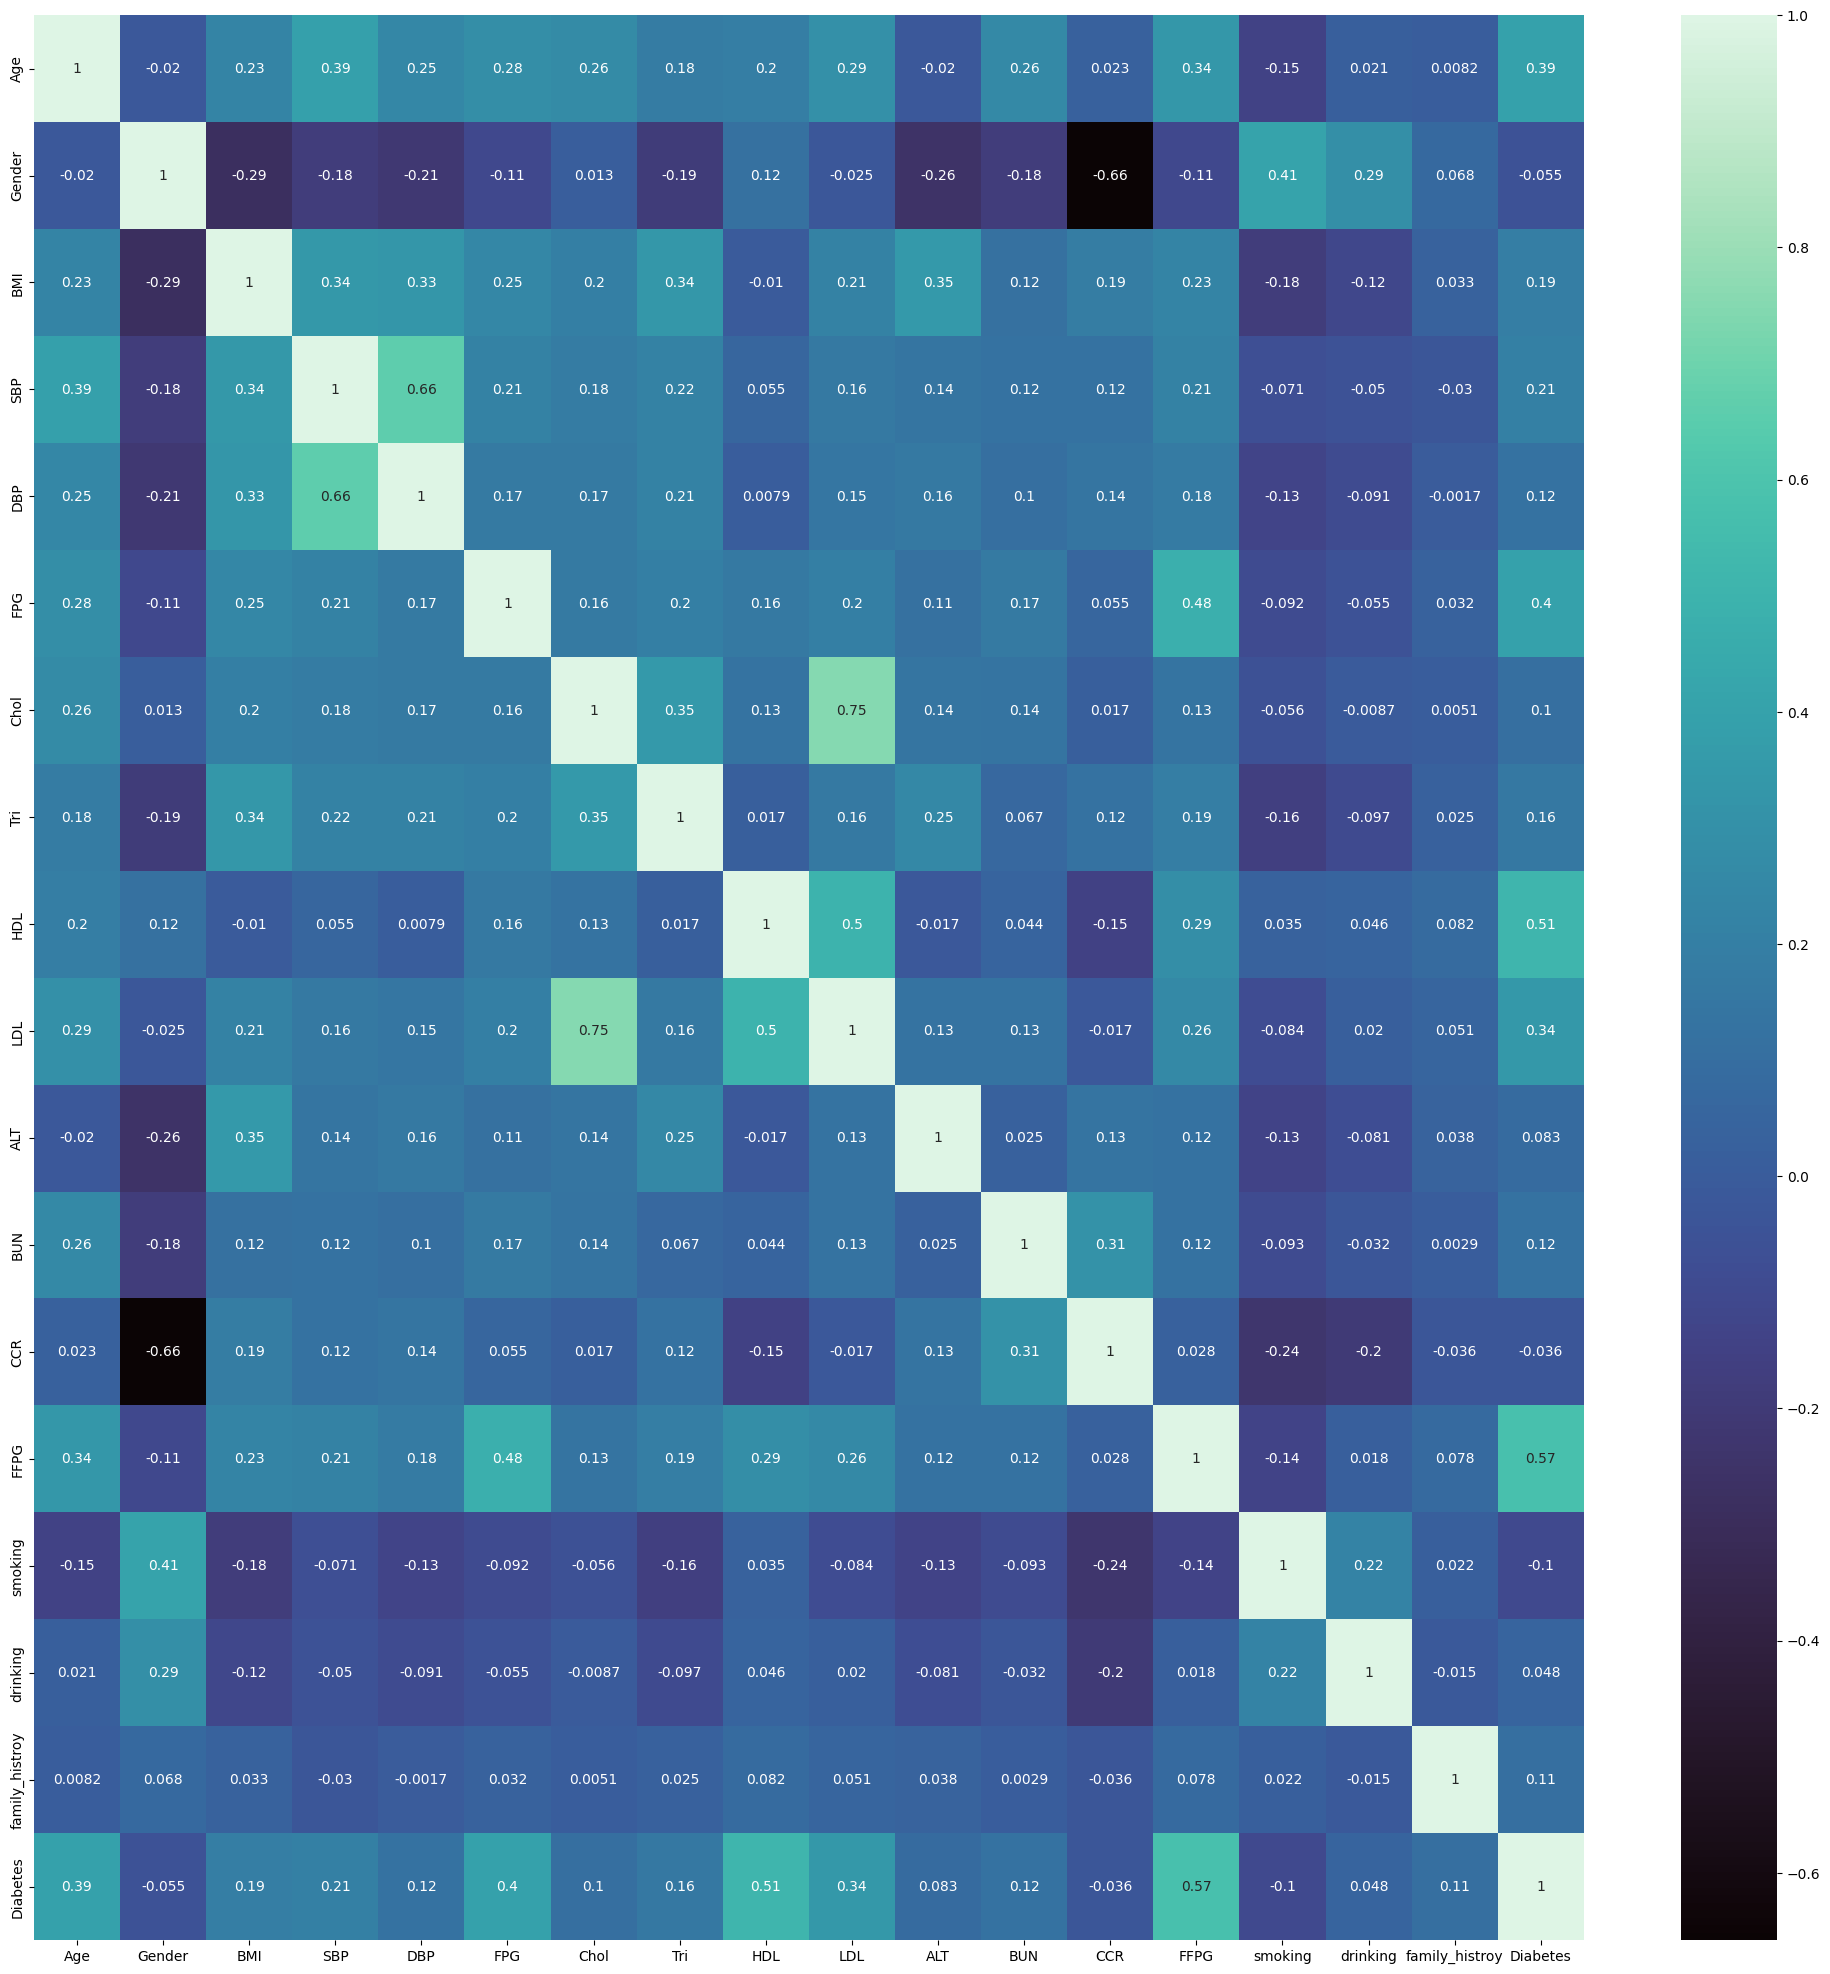

In [16]:
correlation = my_data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation, annot=True, cmap='mako')

- Kiểm tra việc chuẩn hóa dữ liệu

In [ ]:
my_data.dtypes

,0
Age,int64
Gender,int64
BMI,float64
SBP,int64
DBP,int64
FPG,float64
Chol,float64
Tri,float64
HDL,float64
LDL,float64


- Phan tich su phan bo cua nhan
 - 0: không tiểu đường, 1: tiền tiểu đường, 2: tiểu đường

In [17]:
print(my_data['Diabetes'].value_counts())
# tinh ti le cua cac lop
my_data['Diabetes'].value_counts(True)

Diabetes
0    3000
1     415
Name: count, dtype: int64


,proportion
Diabetes,
0,0.878477
1,0.121523


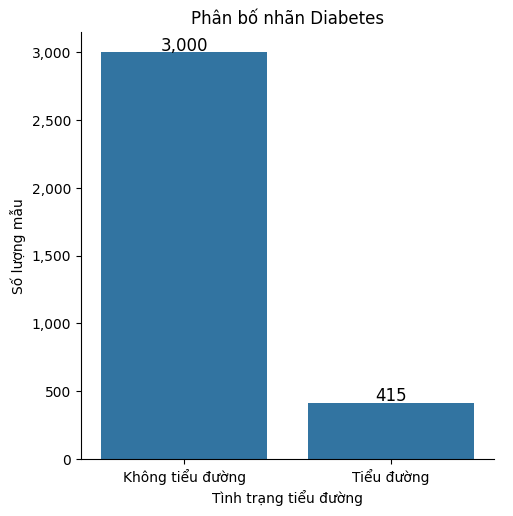

In [18]:
from matplotlib.ticker import FuncFormatter
# Tạo biểu đồ đếm (count plot) cho cột Diabetes_012
g = sns.catplot(x='Diabetes', kind='count', data=my_data)

# Sửa nhãn trên trục x, đổi ký hiệu 0,  2 thành nhãn có ý nghĩa
g.set_xticklabels(['Không tiểu đường', 'Tiểu đường'])

# Chuyển định dạng nhãn trên trục y sang dạng số nguyên (không có ký hiệu khoa học)
ax = g.ax
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Thêm số lượng vào cột đầu tiên và cột thứ hai
for i, p in enumerate(ax.patches):
    # Lấy số lượng từ chiều cao cột
    count = int(p.get_height())
    # Tính vị trí để đặt nhãn
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    # Thêm nhãn
    if i == 0:  # Cột đầu tiên
        ax.annotate(f'{count:,}',
                    (x, y),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')
    elif i == 1:  # Cột thứ hai
        ax.annotate(f'{count:,}',
                    (x, y),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

# Đặt tiêu đề và nhãn trục
ax.set_title('Phân bố nhãn Diabetes')
ax.set_xlabel('Tình trạng tiểu đường')
ax.set_ylabel('Số lượng mẫu')

# Hiển thị biểu đồ
plt.show()

# Chia Tập Train/Test cho Dữ Liệu BRFSS 2015

- **Hold-Out với Stratified Split**:
  - **Lý do**: Phù hợp nếu cần một tập test cố định để so sánh nhiều mô hình, hoặc muốn đánh giá nhanh.
  - **Kích thước**:
    - Tập train: (70%).
    - Tập test: (30%).
  - **Phân bố lớp**: Tỷ lệ lớp giữ nguyên như dữ liệu gốc.

Kích thước tập train: (2390, 17)
Kích thước tập test: (1025, 17)

Phân bố lớp trong tập train:
Diabetes
0    0.878661
1    0.121339
Name: proportion, dtype: float64

Phân bố lớp trong tập test:
Diabetes
0    0.878049
1    0.121951
Name: proportion, dtype: float64


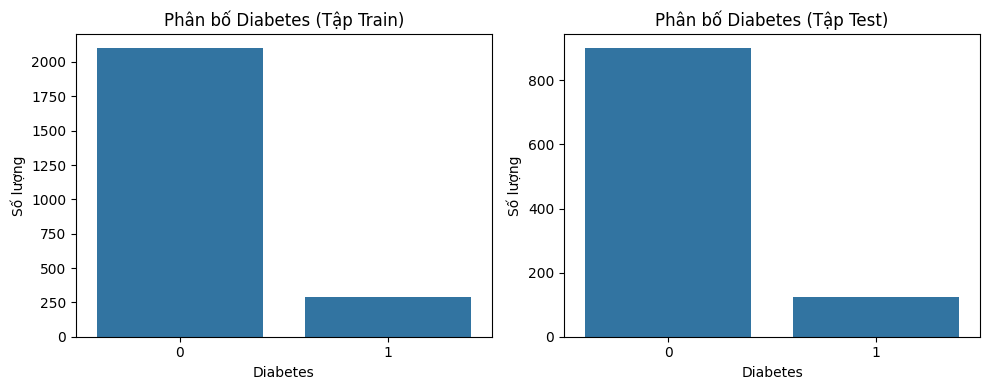

In [28]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành X (features) và y (target)
X = my_data.drop('Diabetes', axis=1)
y = my_data['Diabetes']

# Hold-Out: Chia dữ liệu thành tập train và test (60/40) với stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Kiểm tra kích thước tập train và test
print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

# Kiểm tra phân bố lớp trong tập train và test
print("\nPhân bố lớp trong tập train:")
print(y_train.value_counts(normalize=True))
print("\nPhân bố lớp trong tập test:")
print(y_test.value_counts(normalize=True))

# Vẽ biểu đồ để so sánh phân bố
plt.figure(figsize=(10, 4))

# Phân bố tập train
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Phân bố Diabetes (Tập Train)')
plt.xlabel('Diabetes')
plt.ylabel('Số lượng')

# Phân bố tập test
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Phân bố Diabetes (Tập Test)')
plt.xlabel('Diabetes')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

skewed_cols = ['CCR', 'FFPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'Age', 'BMI', 'FPG']
standard_columns = ['SBP', 'DBP']
robust_columns = ['smoking']
minmax_columns = ['drinking']

# Chuẩn hóa các cột lệch phải (Log Transformation + RobustScaler)
for col in skewed_cols:
    X_train[col] = X_train[col].replace(0, 1e-6)
    X_test[col] = X_test[col].replace(0, 1e-6)

    X_train[f'{col}_log'] = np.log(X_train[col])
    X_test[f'{col}_log'] = np.log(X_test[col])

    X_train[f'{col}_robust'] = robust_scaler.fit_transform(X_train[[f'{col}_log']])
    X_test[f'{col}_robust'] = robust_scaler.transform(X_test[[f'{col}_log']])

    X_train.drop(columns=[col, f'{col}_log'], inplace=True)
    X_test.drop(columns=[col, f'{col}_log'], inplace=True)

    X_train.rename(columns={f'{col}_robust': col}, inplace=True)
    X_test.rename(columns={f'{col}_robust': col}, inplace=True)

# StandardScaler
X_train[standard_columns] = standard_scaler.fit_transform(X_train[standard_columns])
X_test[standard_columns] = standard_scaler.transform(X_test[standard_columns])

# RobustScaler
X_train[robust_columns] = robust_scaler.fit_transform(X_train[robust_columns])
X_test[robust_columns] = robust_scaler.transform(X_test[robust_columns])

# MinMaxScaler
X_train[minmax_columns] = minmax_scaler.fit_transform(X_train[minmax_columns])
X_test[minmax_columns] = minmax_scaler.transform(X_test[minmax_columns])

X_train.describe()
X_test.describe()

,Gender,SBP,DBP,smoking,drinking,family_histroy,CCR,FFPG,Chol,Tri,HDL,LDL,ALT,BUN,Age,BMI,FPG
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,1.326829,0.029308,0.058868,-0.480976,0.893171,0.055610,-0.065926,0.193748,-0.049461,-0.012092,0.159321,-0.021130,0.077696,-0.038082,0.069443,0.004019,-0.001137
std,0.469283,1.003589,0.975452,0.827906,0.231866,0.229278,0.775090,1.127369,0.743889,0.724814,1.145725,0.795521,0.760968,0.704714,0.613344,0.711949,0.835230
min,1.000000,-2.072998,-2.584592,-2.000000,0.000000,0.000000,-8.537409,-2.019144,-3.028419,-4.475678,-3.337196,-3.929354,-1.798181,-2.473011,-1.344416,-2.028332,-3.150960
25%,1.000000,-0.674170,-0.605514,-1.000000,1.000000,0.000000,-0.518877,-0.483924,-0.563739,-0.503464,-0.509517,-0.483214,-0.458463,-0.508066,-0.439337,-0.526639,-0.481782
50%,1.000000,-0.065984,0.054179,0.000000,1.000000,0.000000,0.056570,0.006778,-0.029057,-0.029760,0.000000,-0.031173,-0.018729,0.006209,0.048923,0.021717,-0.024433
75%,2.000000,0.663839,0.713872,0.000000,1.000000,0.000000,0.438048,0.528663,0.441683,0.458915,0.518048,0.465988,0.495521,0.427021,0.522513,0.497417,0.514241
max,2.000000,3.765587,3.164159,0.000000,1.000000,1.000000,2.515505,6.880059,2.744563,2.851071,4.042450,2.342200,3.297533,3.040442,1.514095,2.295593,2.017445


In [ ]:
!pip install imbalanced-learn

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import joblib


# Áp dụng SMOTE để cân bằng dữ liệu trên tập train
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Kiểm tra phân bố sau khi áp dụng SMOTE
print("\nPhân bố lớp trong tập train sau khi áp dụng SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

# Kiểm tra kích thước
print(f"Kích thước tập train (sau SMOTE): {X_train_balanced.shape}")
print(f"Kích thước tập test: {X_test.shape}")


Phân bố lớp trong tập train sau khi áp dụng SMOTE:
Diabetes
0    0.5
1    0.5
Name: proportion, dtype: float64
Kích thước tập train (sau SMOTE): (4200, 17)
Kích thước tập test: (1025, 17)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score

# Định nghĩa tham số cho GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(f1_score, average='weighted')
)

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất và điểm số tốt nhất
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Lấy mô hình tốt nhất và huấn luyện lại trên toàn bộ tập train
knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = knn_model.predict(X_test)

# Hàm in các chỉ số đánh giá (tương đương print_scores)
def print_scores(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true=y_true, y_pred=y_pred))

# In báo cáo phân loại
print_scores(y_test, y_pred)

# In tham số của mô hình
print("Model parameters: ", knn_model.get_params())

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best score:  0.9365532000125081
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       900
           1       0.84      0.65      0.73       125

    accuracy                           0.94      1025
   macro avg       0.90      0.82      0.85      1025
weighted avg       0.94      0.94      0.94      1025

Model parameters:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


## Random Forest
- **Lý do chọn:**
    - Xử lý phi tuyến: Random Forest (RF) là tập hợp nhiều cây quyết định, có khả năng nắm bắt các mối quan hệ phi tuyến và tương tác giữa các đặc tính.
    - Dữ liệu không cân bằng: RF hỗ trợ tham số class_weight để ưu tiên lớp thiểu số, hoặc có thể kết hợp với SMOTE.
    - Dữ liệu lớn: RF có thể huấn luyện nhanh với tham số n_jobs=-1 (sử dụng tất cả CPU).
    - Khả năng giải thích: RF cung cấp feature importance, giúp xác định các yếu tố nguy cơ chính (ví dụ: BMI, HighBP).
    - Hiệu suất tốt: RF thường đạt hiệu suất cao trên các bài toán phân loại, đặc biệt với dữ liệu sức khỏe.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score

# Định nghĩa tham số cho GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 150, 200, 250]
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=10
)

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best parameters: ", grid_search.best_params_)

# Lấy mô hình tốt nhất và huấn luyện lại trên toàn bộ tập train
rf_model = grid_search.best_estimator_
rf_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = rf_model.predict(X_test)

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred))

Best parameters:  {'criterion': 'entropy', 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.83      0.69      0.75       125

    accuracy                           0.94      1025
   macro avg       0.89      0.83      0.86      1025
weighted avg       0.94      0.94      0.94      1025



In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score
import joblib

# Định nghĩa các tham số cho Grid Search
param_grid = {
    'kernel': ['rbf', 'linear'],  # Thử hai loại kernel
    'C': [0.1, 1, 10],           # Thử các giá trị C
    'gamma': ['scale', 'auto']   # Thử các giá trị gamma
}

# Khởi tạo mô hình SVM
svm_model = SVC(class_weight='balanced', random_state=42)

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1)

# Huấn luyện Grid Search trên mẫu dữ liệu
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("\nTham số tốt nhất từ Grid Search:", grid_search.best_params_)
print("F1-score tốt nhất trên tập huấn luyện:", grid_search.best_score_)

# Lấy mô hình tốt nhất từ Grid Search
best_svm_model = grid_search.best_estimator_

# Dự đoán trên tập test
y_pred_svm = best_svm_model.predict(X_test)

# Đánh giá hiệu suất
print("\nBáo cáo hiệu suất của SVM trên tập test:")
print(classification_report(y_true=y_test, y_pred=y_pred))
# f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
# print(f"F1-score (weighted) của SVM: {f1_svm:.4f}")

# # Lưu mô hình tốt nhất
# joblib.dump(best_svm_model, 'svm_model_optimized.pkl')
# print("Đã lưu mô hình SVM tối ưu: svm_model_optimized.pkl")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Tham số tốt nhất từ Grid Search: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
F1-score tốt nhất trên tập huấn luyện: 0.9274812114734299

Báo cáo hiệu suất của SVM trên tập test:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.83      0.69      0.75       125

    accuracy                           0.94      1025
   macro avg       0.89      0.83      0.86      1025
weighted avg       0.94      0.94      0.94      1025



In [ ]:
# So sánh hiệu suất
test_scores = {
    'Random Forest': rf_model,
    'SVM': f1_svm,
    'Logistic Regression': f1_lr
}

# In kết quả
print("\n=== So sánh hiệu suất (F1-score weighted) ===")
for name, score in test_scores.items():
    print(f"{name}: {score:.4f}")

# Vẽ biểu đồ so sánh
plt.figure(figsize=(8, 5))
sns.barplot(x=list(test_scores.values()), y=list(test_scores.keys()))
plt.title('So sánh F1-score của các thuật toán trên tập test')
plt.xlabel('F1-score (weighted)')
plt.ylabel('Thuật toán')
plt.show()